# Neural Networks for Cancer Prediction using gene expression

Data used in this assessment is an RNA-seq gene expression data for different cancer types. In this data rows represents cancer samples and columns represent gene count values.

The original data cane be found here: https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq#

# Required Libraries
•	numpy
•	matplotlib
•	pandas
•	TensorFlow
•	keras
•	scikit-learn

In [28]:
#Data handling
import pandas as pd
import numpy as np
import tensorflow as tf

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Classification
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Read data

In [2]:
#read data directly from a github repository
df = pd.read_csv("https://raw.githubusercontent.com/LekhaUNN/Cancer_Prediction_using_gene_expression_data/main/Cancer-Prediction-gene-expression-dataset.csv")

# Data Exploration & Cleaning

In [3]:
#let's check the number of samples from features
#note:the last column contain the labels. it is not considered as a feature

print(df.shape)

(801, 3001)


In [5]:
#lets check some of the columns (first, second and third column)
print(df.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [7]:
#lets check the name of the last column of this dataframe

df.columns[-1]

'Cancer_Type'

In [10]:
df['Cancer_Type'].head()

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Cancer_Type, dtype: object

In [8]:
#check for missing values
datanul=df.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing value:%d'%len(g))

columns with missing value:0


In [11]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(df['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


Here we can see that there are 5 classes/cancer types. And you can also see the number of samples diagnosed with a cancer type

# Data Preprocessing

In [12]:
#we will now separate the feature values from the class. We do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [14]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder

label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

In [26]:
nclasses

5

# Data Normalization
Data normalization is done so that the value are in the same range. This will improve model performance and avoid bias

In [ ]:
### scale the data between 0-1

In [15]:
min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(X)

# Data Splitting
Data is split into three: training, validation and test sets
-training set is used for training
-validation set is used for evaluating the model during training.
-test set is used to test the model after training and tuning has been completed.

In [73]:
#split data into training ,validation and test sets

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.5)

In [74]:
X_train.shape

(200, 3000)

In [75]:
type(X_train)

numpy.ndarray

In [76]:
X_train[0:10,0:10]

array([[0.        , 0.17145304, 0.64652414, 0.15378966, 0.44533039,
        0.        , 0.57993537, 0.        , 0.        , 0.        ],
       [0.        , 0.57564838, 0.50037025, 0.25124703, 0.57856184,
        0.        , 0.62697693, 0.        , 0.        , 0.        ],
       [0.        , 0.64112655, 0.58343425, 0.25920622, 0.60365132,
        0.        , 0.39401788, 0.15790713, 0.        , 0.        ],
       [0.        , 0.49818322, 0.55261401, 0.37166322, 0.39821834,
        0.        , 0.37412381, 0.14546531, 0.        , 0.        ],
       [0.        , 0.62692879, 0.50262535, 0.17145852, 0.24550956,
        0.        , 0.67852096, 0.71161125, 0.        , 0.        ],
       [0.        , 0.28297755, 0.31912465, 0.28677269, 0.25315558,
        0.        , 0.25182733, 0.        , 0.        , 0.        ],
       [0.        , 0.1747473 , 0.36862896, 0.26628176, 0.1885683 ,
        0.        , 0.40090457, 0.        , 0.        , 0.        ],
       [0.        , 0.60170174, 0.5301327

# Build a Neural Network Model

In [77]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(30, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam=keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [78]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.4950 - sparse_categorical_accuracy: 0.3722 - val_loss: 1.2247 - val_sparse_categorical_accuracy: 0.4300
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1099 - sparse_categorical_accuracy: 0.5535 - val_loss: 0.9299 - val_sparse_categorical_accuracy: 0.7400
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7862 - sparse_categorical_accuracy: 0.7864 - val_loss: 0.6677 - val_sparse_categorical_accuracy: 0.8450
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5533 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.5589 - val_sparse_categorical_accuracy: 0.7950
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4018 - sparse_categorical_accuracy: 0.9289 - val_loss: 0.2923 - val_sparse_categorical_accuracy: 0.9950
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2541 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.2089 - val_sparse_categorical_accuracy: 0.9950
Epoch 7/200
7/7 

In [79]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [80]:
accuracy

0.9975062608718872

In [81]:
predictions[0]

array([9.9997485e-01, 1.3879317e-06, 7.3271434e-07, 2.0125679e-05,
       2.9636976e-06], dtype=float32)

In [68]:
np.argmax(predictions[0])

2

In [82]:
classes

array([0, 1, 2, 3, 4])

In [83]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [84]:
#get the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:4 ,actual:4
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:2 ,actual:2
predicted:4 ,actual:4
predicted:2 ,actual:2
predicted:4 ,actual:4
predicted:0 ,actual:0


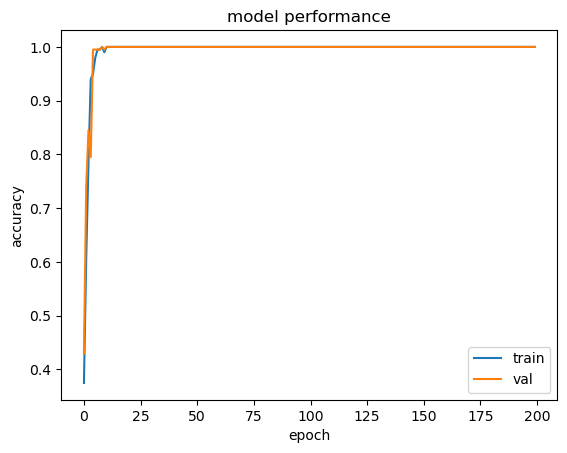

In [85]:
#summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

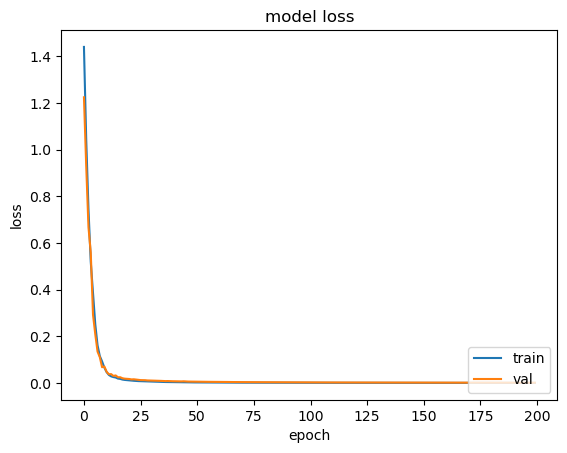

In [86]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()